In [30]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

degree=2
%matplotlib inline

In [31]:
data = pd.read_csv(r"C:\Users\User\Desktop\project\bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
data.dropna(subset = ["Open"], inplace=True) 
data.head(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [32]:
data.shape 

(3613769, 8)

In [33]:
data.describe() 

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.497898e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,7.443689e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.433683e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.505880e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.562208e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


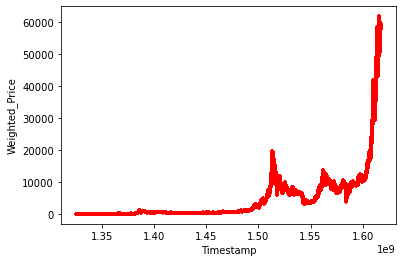

In [34]:
data.plot(kind="scatter", x="Timestamp", y= "Weighted_Price", color='red', marker='+') 

In [35]:
X = data.drop('Weighted_Price',axis=1)
y = data['Weighted_Price'].values.reshape(-1,1)
X

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160
...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
print(len(y_test))

722754


In [37]:
reg = LinearRegression() 
reg.fit(X_train, y_train) 

LinearRegression()

In [38]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 [-3.73105039]
Coefficients: 
 [[ 2.63127383e-09 -2.18291049e-02  4.69283701e-01  4.81914805e-01
   7.06092847e-02 -1.09797869e-03 -1.51105081e-07]]


In [39]:
y_pred = reg.predict(X_test)
len(y_pred)

722754

In [40]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,600.075666,600.285519
1,8827.442888,8831.365331
2,964.991319,964.907758
3,10550.035694,10549.999161
4,282.638901,282.829329
...,...,...
722749,251.326257,251.125860
722750,3735.714273,3736.005188
722751,759.290000,759.439115
722752,8634.801481,8635.231916


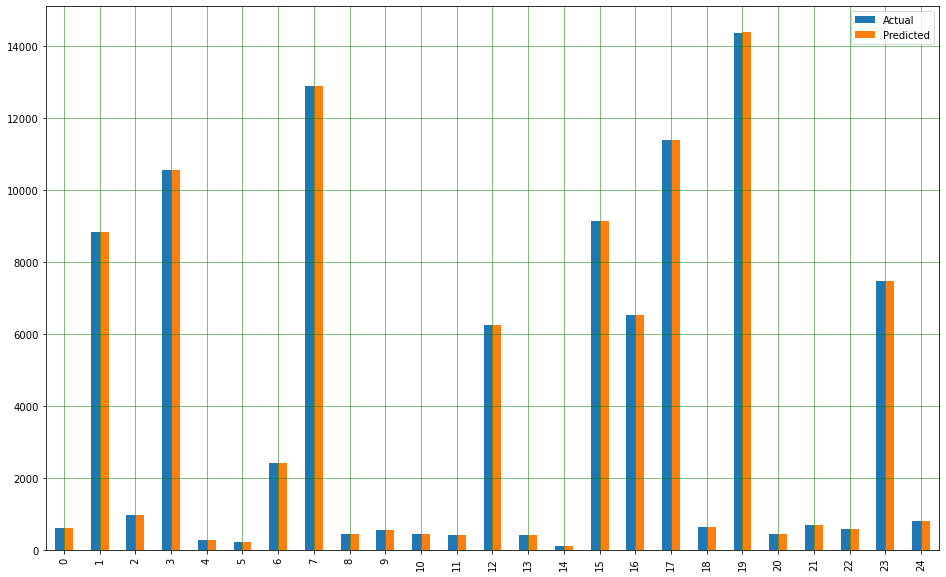

In [41]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show() 

In [42]:
score = max_error(y_test, y_pred)
print("Max Error is ", round(score, 1))

Max Error is  338.0


In [43]:
score = mean_absolute_error(y_test, y_pred)
print("Mean abosolute error is ", round(score, 1))

Mean abosolute error is  1.6


In [44]:
score = mean_squared_error(y_test, y_pred)
print("Mean squared error is ", round(score, 1))

Mean squared error is  16.0


In [45]:
lin_score = cross_val_score(reg, X, y, cv = 5, scoring='neg_mean_absolute_error')
lin_score

array([-0.41918684, -0.15073719, -2.37795899, -1.4833564 , -3.64567504])

In [46]:
lin_score_n = -lin_score
lin_score_n

array([0.41918684, 0.15073719, 2.37795899, 1.4833564 , 3.64567504])

In [47]:
np.mean(lin_score_n)

1.6153828917810693

In [48]:
#polynomial regression
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

In [49]:
polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [50]:
y_pred = polyreg.predict(X_test)

In [51]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,600.075666,613.730103
1,8827.442888,8832.055866
2,964.991319,969.588850
3,10550.035694,10566.624361
4,282.638901,276.204433
...,...,...
722749,251.326257,255.738854
722750,3735.714273,3753.205817
722751,759.290000,755.948037
722752,8634.801481,8661.945265


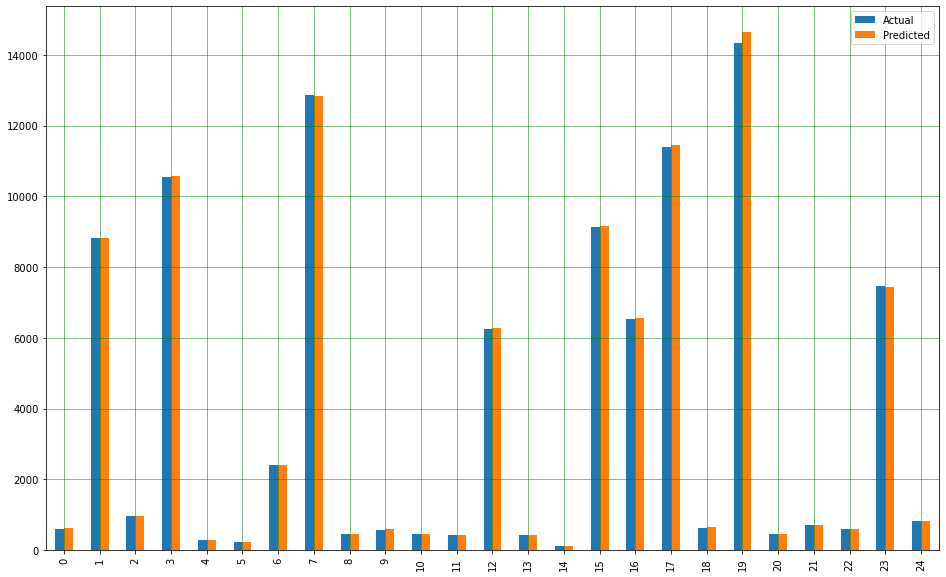

In [52]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show() 

In [53]:
score = max_error(y_test, y_pred)
print("Max Error is ", round(score, 1))

Max Error is  7847.0


In [54]:
score = mean_absolute_error(y_test, y_pred)
print("Mean abosolute error is ", round(score, 1))

Mean abosolute error is  37.0


In [55]:
score = mean_squared_error(y_test, y_pred)
print("Mean squared error is ", round(score, 1))

Mean squared error is  8180.5


In [56]:
poly_score = cross_val_score(polyreg, X, y, cv = 5, scoring='neg_mean_absolute_error')
poly_score

array([ -794.25409749,   -71.43884754,  -178.55345366,  -244.66497328,
       -6054.40891167])

In [57]:
poly_score_n = -poly_score
poly_score_n

array([ 794.25409749,   71.43884754,  178.55345366,  244.66497328,
       6054.40891167])

In [58]:
np.mean(poly_score_n)

1468.6640567305271